In [23]:
#!wget https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv
#!wget https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/kiwo.csv
#!wget https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/umsatzdaten_gekuerzt.csv

In [8]:
import pandas as pd

weather_df = pd.read_csv("wetter.csv")
kiwo_df = pd.read_csv("kiwo.csv")
sales_df = pd.read_csv("umsatzdaten_gekuerzt.csv")
holidays_df = pd.read_csv("holidays.csv")

print("Weather")
print(f" has {len(weather_df)} rows")
print(weather_df.head())
print("Kieler Woche")
print(f" has {len(kiwo_df)} rows")
print(kiwo_df.head())
print("Sales")
print(f" has {len(sales_df)} rows")
print(sales_df.head())
print("Holidays")
print(f" has {len(holidays_df)} rows")
print(holidays_df.head())

Weather
 has 2601 rows
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0
Kieler Woche
 has 72 rows
        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
Sales
 has 9334 rows
        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
Holidays
 has 399 rows
         date  summer  autumn  christmas  winter  easter  pentecoast
0  2013-06-24   

In [12]:
df = weather_df.merge(kiwo_df, on="Datum", how="left").merge(sales_df, on="Datum").merge(holidays_df, left_on="Datum", right_on="date", suffixes=("", "holiday_",))
df.fillna({"KielerWoche": 0, "holiday_sommer": 0, "holiday_autumn": 0, "holiday_christmas": 0, "holiday_winter": 0, "holiday_easter": 0, "holiday_pentecoast": 0}, inplace=True)
print(df.head())

        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
0  2013-07-01         6.0     17.8375                   15        20.0   
1  2013-07-01         6.0     17.8375                   15        20.0   
2  2013-07-01         6.0     17.8375                   15        20.0   
3  2013-07-01         6.0     17.8375                   15        20.0   
4  2013-07-01         6.0     17.8375                   15        20.0   

   KielerWoche  Warengruppe      Umsatz        date  summer  autumn  \
0          0.0            1  148.828353  2013-07-01       1       0   
1          0.0            2  535.856285  2013-07-01       1       0   
2          0.0            3  201.198426  2013-07-01       1       0   
3          0.0            4   65.890169  2013-07-01       1       0   
4          0.0            5  317.475875  2013-07-01       1       0   

   christmas  winter  easter  pentecoast  
0          0       0       0           0  
1          0       0       0           0  

In [13]:
df.sample()

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Warengruppe,Umsatz,date,summer,autumn,christmas,winter,easter,pentecoast
1739,2017-08-10,6.0,19.6,9,NaN,0.0,1,144.270402,2017-08-10,1,0,0,0,0,0


In [14]:
df.describe()

,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Warengruppe,Umsatz,summer,autumn,christmas,winter,easter,pentecoast
count,1859.000000,1859.000000,1859.000000,1246.000000,1859.0,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000
mean,4.290479,15.409256,11.141474,36.620385,0.0,3.035503,256.821509,0.533082,0.145777,0.139860,0.016138,0.154384,0.010758
std,2.595137,6.853433,3.942113,27.211907,0.0,1.459842,185.104181,0.499039,0.352978,0.346935,0.126039,0.361414,0.103191
min,0.000000,-6.000000,4.000000,0.000000,0.0,1.000000,18.483993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,10.175000,8.000000,10.000000,0.0,2.000000,116.234559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,16.525000,10.000000,21.000000,0.0,3.000000,219.280742,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,20.375000,13.000000,61.000000,0.0,4.000000,333.644368,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,31.437500,25.000000,95.000000,0.0,6.000000,1879.461831,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.dtypes

Datum                   object
Bewoelkung             float64
Temperatur             float64
Windgeschwindigkeit      int64
Wettercode             float64
KielerWoche            float64
Warengruppe              int64
Umsatz                 float64
date                    object
summer                   int64
autumn                   int64
christmas                int64
winter                   int64
easter                   int64
pentecoast               int64
dtype: object

In [16]:
df['Datum_dt'] = pd.to_datetime(df['Datum'])
df['Warengruppe_String'] = df['Warengruppe'].map(
    {
        1: 'Bread', 
        2: 'Rolls', 
        3: 'Croissant',
        4: 'Cake',
        5: 'Confectionery',
        6: 'Seasonal Bread',
    }
)

In [17]:
stats = df.groupby(df['Warengruppe'])['Umsatz'].agg(['mean', 'count', 'std', 'sum'])
stats

,mean,count,std,sum
Warengruppe,,,,
1,141.193263,371,46.740320,52382.700617
2,515.149541,371,140.880916,191120.479691
3,226.087766,371,84.471536,83878.561137
4,87.632758,344,28.872469,30145.668835
5,318.460582,371,164.225000,118148.875902
6,56.609674,31,35.140319,1754.899901


Text(0.5, 1.0, 'Mean Revenue per Article Group')

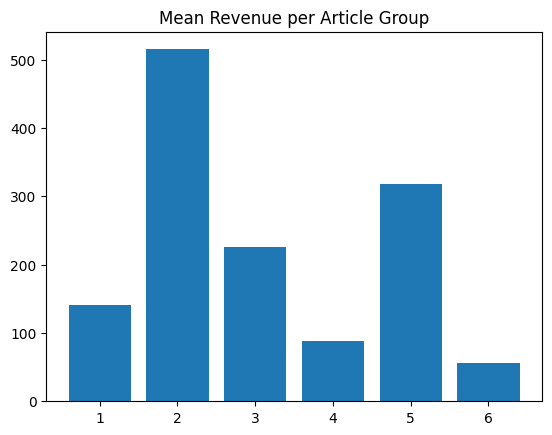

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as st
import math

fig, ax = plt.subplots()
ax.bar(stats.index, stats["mean"])

ax.set_title("Mean Revenue per Article Group")

Text(0.5, 1.0, 'Amount of Sales per Article Group')

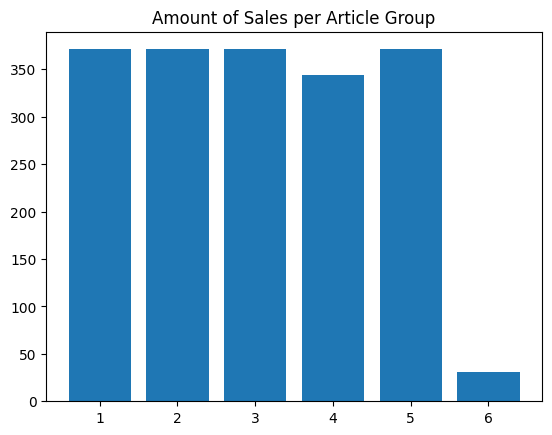

In [19]:
fig, ax = plt.subplots()
ax.bar(stats.index, stats["count"])

ax.set_title("Amount of Sales per Article Group")

Text(0.5, 1.0, 'Revenue against Temperature')

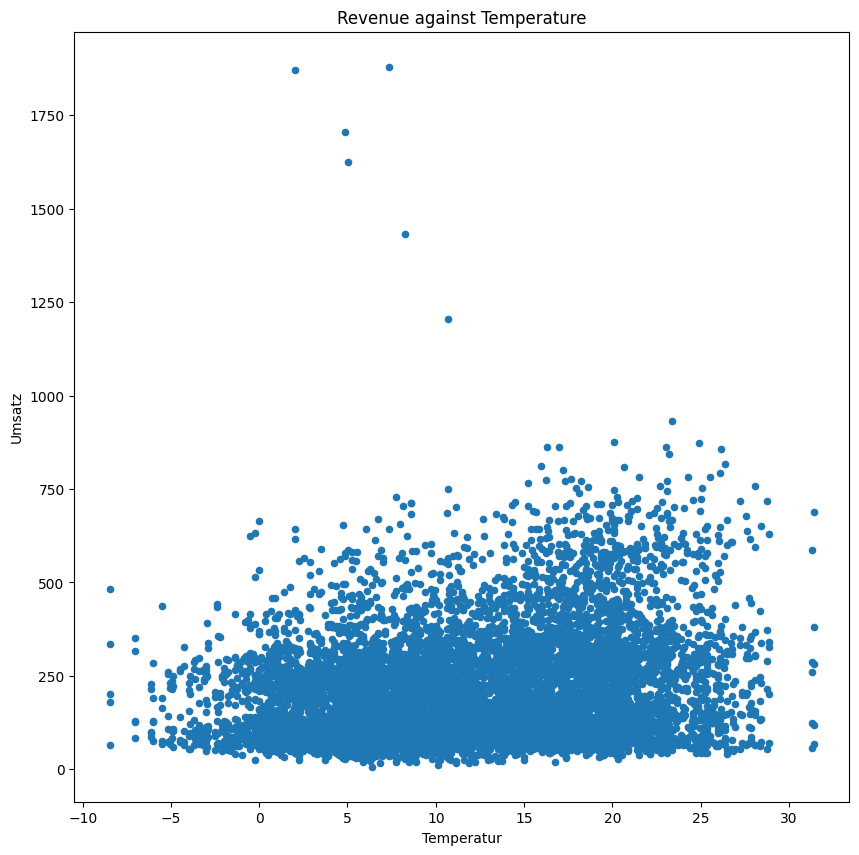

In [33]:
ax = df.plot(x='Temperatur',y='Umsatz',kind='scatter',figsize=(10,10))
ax.set_title("Revenue against Temperature")

Text(0.5, 1.0, 'Revenue against Temperature/Cloudiness')

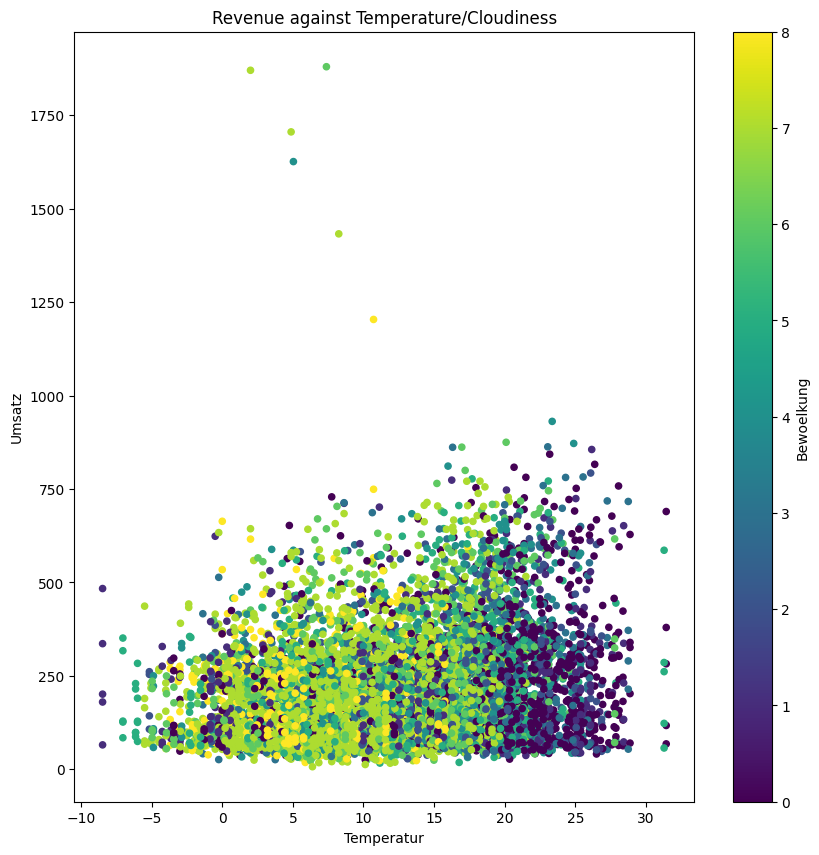

In [34]:
ax = df.plot(x='Temperatur',y='Umsatz',kind='scatter',figsize=(10,10), c="Bewoelkung")
ax.set_title("Revenue against Temperature/Cloudiness")

Text(0.5, 1.0, 'Total Revenue per Weather Code')

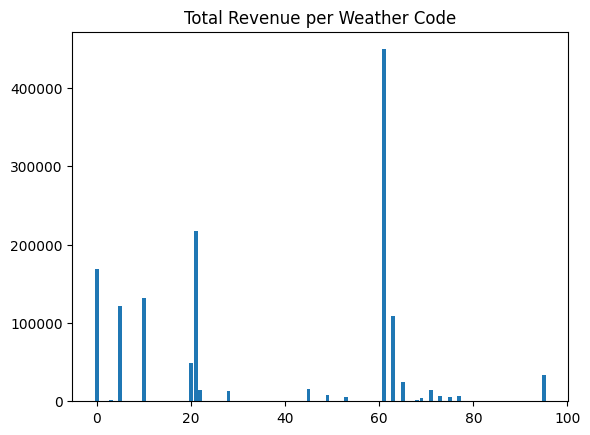

In [35]:
stats_weather_code = df.groupby(df['Wettercode'])['Umsatz'].agg(['mean', 'count', 'std', 'sum'])

fig, ax = plt.subplots()
ax.bar(stats_weather_code.index, stats_weather_code["sum"])

ax.set_title("Total Revenue per Weather Code")

(array([  50.,  230.,  869., 1680., 1756., 1378., 1686., 1204.,  395.,
          70.]),
 array([-8.475  , -4.48375, -0.4925 ,  3.49875,  7.49   , 11.48125,
        15.4725 , 19.46375, 23.455  , 27.44625, 31.4375 ]),
 <BarContainer object of 10 artists>)

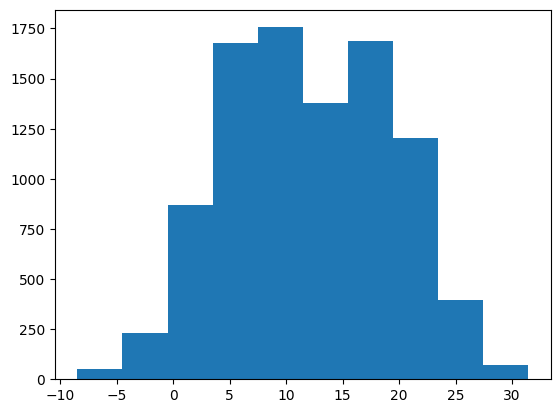

In [39]:
fig, ax = plt.subplots()

ax.hist(df["Temperatur"])
ax.set_title("Distribution of Temperature")

In [41]:
print(df.sample())
corr = df.drop("Datum", axis=1).drop("Warengruppe_String", axis=1)
print(corr.sample())
corr = corr.corr()
corr.style.background_gradient(cmap='coolwarm').set_caption("Correlation Matrix")

           Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
8508  2018-02-17         8.0       4.125                    5        10.0   

      KielerWoche  Warengruppe     Umsatz   Datum_dt Warengruppe_String  
8508          0.0            1  148.51476 2018-02-17              Bread  
      Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  KielerWoche  \
7187         0.0      17.375                   12         5.0          0.0   

      Warengruppe      Umsatz   Datum_dt  
7187            1  122.612603 2017-06-01  


,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Warengruppe,Umsatz,Datum_dt
Bewoelkung,1.000000,-0.391635,0.041809,0.525547,0.011251,0.023795,-0.089916,-0.004927
Temperatur,-0.391635,1.000000,0.003734,-0.086582,0.138339,-0.047015,0.222935,-0.034489
Windgeschwindigkeit,0.041809,0.003734,1.000000,0.119232,0.020500,-0.009078,0.014705,-0.010375
Wettercode,0.525547,-0.086582,0.119232,1.000000,0.066911,0.009547,-0.010091,-0.092056
KielerWoche,0.011251,0.138339,0.020500,0.066911,1.000000,-0.010199,0.058242,0.047487
Warengruppe,0.023795,-0.047015,-0.009078,0.009547,-0.010199,1.000000,-0.062385,-0.006687
Umsatz,-0.089916,0.222935,0.014705,-0.010091,0.058242,-0.062385,1.000000,-0.086770
Datum_dt,-0.004927,-0.034489,-0.010375,-0.092056,0.047487,-0.006687,-0.086770,1.000000


ax = df.plot(x='x',y='y',kind='scatter',figsize=(10,10))
df[['x','y','label']].apply(lambda x: ax.text(*x),axis=1)